# **Análise das Eleições Municipais de 2020 do Estado de São Paulo - Desafio Técnico**

---

<center><img alt="Logo anp" width="30%" src="./img/banner.jpg"></center>

## **1. Objetivo do relatório**

Este projeto tem como objetivo realizar uma análise exploratória nas bases de dados fornecidas, assim como também realizar o tratamento desses dados e por fim realizar consultas trazendo insights importantes para futuras tomadas de decisões. 

Os pontos a serem trazidos neste relatório são:
- Em qual município o candidato X foi mais votado;
- Qual candidato foi mais votado em cada município;
- Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato.

##### **1.1. Sobre os dados utilizados**

Os dados fornecidos para a execução desse relatório são bases de dados do Perfil do Eeitorado e os resultados das urnas de São Paulo 1° turno, ambos do ano de 2020. A análise será apenas do Estado de São Paulo e seus Municípios.

---


## **2. Coleta dos dados** 

Para podermos iniciar nossos trabalhos, iremos coletar os dados necessários e fornecidos para a execução deste relatório.


##### **2.1. Importação das bibliotecas que serão utilizadas**

In [94]:
#importando bibliotecas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Utilizando a biblioteca warnings para retirar avisos da execução do código para uma visualização mais limpa.
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas dos pacotes:
print('Pacotes Prontos! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')


Pacotes Prontos! Versões Utilizadas:

Pandas      --> 1.5.3
Matplotlib  --> 3.7.1


##### **2.2. Coleta dos dados necessários para análise**

Agora iremos coletar os dados que serão ultilizados fazendo a leitura dos arquivos .csv que estão disponíveis na pasta "csv" no repositório deste projeto.

In [82]:
#Coleta do perfil do eleitorado já os transformando em DataFrame
eleitorado = pd.read_csv('./csv/perfil_eleitorado_2020.csv', encoding='ISO-8859-1', sep=(';'))
#Coleta dos resultados já os transformando em DataFrame
resultados = pd.read_csv('./csv/SP_turno_1.csv', encoding='ISO-8859-1', sep=(';'))

---

## **3. Análise exploratória** 

Com os dados carregados iremos ter nosso primeiro contato com eles, compreendendo suas características que o definem e sua estrutura. Vamos fazer esta etapa por partes, explorando **primeiro o DataSet do <u>Perfil do Eleitorado</u> e logo em seguida vamos explorar o <u>DataSet de Resultados</u>.**

### **3.1. Perfil do Eleitorado**

- **<u>Dimensão do DataSet e primeira visualização<u>**

In [83]:
#Verificando 5 primeiras linhas do DataSet
eleitorado.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,10,8,0,0
4,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,8,SUPERIOR COMPLETO,23,18,0,0


In [84]:
#Verificando os 5 últimos registros do DataSet
eleitorado.tail()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
4248502,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,7,7,0,0
4248503,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
4248504,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,5,5,0,0
4248505,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,8,SUPERIOR COMPLETO,2,2,0,0
4248506,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,5054,50 a 54 anos,2,LÊ E ESCREVE,1,1,0,0


In [85]:
eleitorado.shape

(4248507, 21)

Na primeira visualização dos nosso dados, podemos ter uma noção de forma mais geral sobre o que se trata nosso DataSet. São dados onde contém registros de vários perfis de eleitores de todo o Brasil, onde por exemplo podemos ver o seu estado civil, sua faixa etaria a qual pertence e o grau escola. E também como podemos verificar nosso DataSet contém **4.248.507 linhas/registros** por **21 colunas/variáveis**, ou seja, temos conosco mais de 4 milhões de perfis de eleitores.

- **<u>Verificando colunas / Dicionário de Variáveis<u>**

In [86]:
eleitorado.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

Ao verificar as 16 colunas do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então compreender melhor cada váriavel.

* `DT_GERACAO` - Data da extração dos dados para geração do arquivo.
* `HH_GERACAO` - Hora da extração dos dados para geração do arquivo.
* `ANO_ELEICAO` - Ano de referência da eleição para geração do arquivo. 
* `SG_UF` - Sigla da Unidade da Federação.
* `CD_MUNICIPIO` - Código do município do domicílio eleitoral do eleitor.
* `NM_MUNICIPIO` - Nome do município do domicílio eleitoral do eleitor.
* `CD_MUN_SIT_BIOMETRIA` - Código da situação biométrica do município.
* `DS_MUN_SIT_BIOMETRIA` - Descrição da situação biométrica do município.
* `NR_ZONA` - Número da zona eleitoral onde ocorreu a eleição.
* `CD_GENERO` - Código do gênero do eleitor.
* `DS_GENERO` - Gênero do eleitor.
* `CD_ESTADO_CIVIL` - Código do estado civil do eleitor.
* `DS_ESTADO_CIVIL` - Estado civil do eleitor de acordo.
* `CD_FAIXA_ETARIA` - Código da faixa etária a qual pertence o eleitor. 
* `DS_FAIXA_ETARIA` - Faixa etária a qual pertence o eleitor.
* `CD_GRAU_ESCOLARIDADE` - Código do grau de escolaridade do eleitor.
* `DS_GRAU_ESCOLARIDADE` - Grau de escolaridade do eleitor.
* `QT_ELEITORES_PERFIL` - Quantidade de eleitores.
* `QT_ELEITORES_BIOMETRIA` - Quantidade de eleitores com biometria.
* `QT_ELEITORES_DEFICIENCIA` - Quantidade de eleitores com deficiência.
* `QT_ELEITORES_INC_NM_SOCIAL` - Quantidade de eleitores com nome social.


- **<u>Checando os tipos de dados</u>**

Ao compreender o que significa cada coluna/váriavel, podemos verificar quais os tipos de dados que compõem cada uma delas.

In [87]:
#Verificar tipos de dados
eleitorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248507 entries, 0 to 4248506
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

Ao verificar os tipos de dados do nosso DataSet, podemos perceber que há um pequeno problema: As colunas **DT_GERACAO** e **HH_GERACAO** que deveriam estar em formato de data e hora, estão do tipo "object", o que dificultaria certas análises com esses dados. Mas para essa análise em específico, não nos trará problema, pois com os objetivos apresentados não usaremos essas váriaveis.

- **<u>Checando Valores Únicos</u>**

In [88]:
#Verificar valores unicos
eleitorado.nunique()

DT_GERACAO                       1
HH_GERACAO                       1
ANO_ELEICAO                      1
SG_UF                           26
CD_MUNICIPIO                  5569
NM_MUNICIPIO                  5296
CD_MUN_SIT_BIOMETRIA             1
DS_MUN_SIT_BIOMETRIA             1
NR_ZONA                        421
CD_GENERO                        3
DS_GENERO                        3
CD_ESTADO_CIVIL                  6
DS_ESTADO_CIVIL                  6
CD_FAIXA_ETARIA                 23
DS_FAIXA_ETARIA                 23
CD_GRAU_ESCOLARIDADE             9
DS_GRAU_ESCOLARIDADE             9
QT_ELEITORES_PERFIL           2953
QT_ELEITORES_BIOMETRIA        2658
QT_ELEITORES_DEFICIENCIA       173
QT_ELEITORES_INC_NM_SOCIAL       8
dtype: int64

Observando os valores únicos do DataSet de Perfil do Eleitorado, podemos perceber que há alguma colunas com apenas um tipo de dado ou valor, ou seja, são colunas que podemos retirar do nosso DataFrame pois não agregaria na nossa análise em específico. Algo interessante é que temos **2.953 perfis diferentes de eleitores**.

- **<u>Checando valores nulos</u>**

Para checar os valores nulos deste banco de dados, precisamos estar ciente das seguintes regras:

1. Campos preenchidos com **#NULO** são campos em branco no banco de dados. Para colunas númericas os campos nulos refere-se por **-1**.

2. Campos com **#NE** significam que naquele ano a informação não era registrada em banco de dados pelos sistemas eleitorais. Para colunas númericas os campos nulos refere-se por **-3**.

In [89]:
#Guardando no DataSet campos que tenham #NULO, #NE, -1 ou -3
valores_nulos_eleitorado = (eleitorado == '#NULO').sum()
valores_nulos_eleitorado_ne = (eleitorado == '#NE').sum()
valores_nulos_numericos_eleitorado = (eleitorado == -1).sum()
valores_nulos_numericos_eleitorado_ne = (eleitorado == -3).sum()

#Criando um DataFrame para uma melhor exibição das colunas que tenham valores nulos 
df_valores_nulos_eleitorado = pd.DataFrame({
    '#NULO': valores_nulos_eleitorado,
    '#NE': valores_nulos_eleitorado_ne,
    '-1': valores_nulos_numericos_eleitorado,
    '-3': valores_nulos_numericos_eleitorado_ne
})

#Renomeando o nome da coluna das váriaveis
df_valores_nulos_eleitorado.rename_axis('Coluna/Váriavel', axis='columns', inplace=True)
df_valores_nulos_eleitorado

Coluna/Váriavel,#NULO,#NE,-1,-3
DT_GERACAO,0,0,0,0
HH_GERACAO,0,0,0,0
ANO_ELEICAO,0,0,0,0
SG_UF,0,0,0,0
CD_MUNICIPIO,0,0,0,0
NM_MUNICIPIO,0,0,0,0
CD_MUN_SIT_BIOMETRIA,0,0,0,0
DS_MUN_SIT_BIOMETRIA,0,0,0,0
NR_ZONA,0,0,0,0
CD_GENERO,0,0,0,0


Como podemos constatar na tabela acima, apenas a coluna **"CD_FAIXA_ETARIA"** tem campos **#NE**, ou seja, em 2100 linhas/registros nesse ano de 2020 essa informação, não foi registrado pelos sistemas eleitorais. Não precisaremos tratar esses campos nulos, pois essa coluna é apenas um código da faixa etaria a qual pertence o eleitor, portanto é uma coluna ínutil para nossa análise.

In [91]:
eleitorado.describe()

,ANO_ELEICAO,CD_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,CD_ESTADO_CIVIL,CD_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
count,4248507.0,4.248507e+06,4248507.0,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06
mean,2020.0,5.185341e+04,0.0,9.923677e+01,3.039349e+00,3.877871e+00,5.279179e+03,4.243422e+00,3.481658e+01,2.767913e+01,2.726214e-01,2.350237e-03
std,0.0,2.838118e+04,0.0,9.135042e+01,1.019962e+00,2.837516e+00,2.105561e+03,2.219556e+00,1.211326e+02,9.975691e+01,1.695875e+00,5.319832e-02
min,2020.0,1.900000e+01,0.0,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2020.0,2.605000e+04,0.0,3.100000e+01,2.000000e+00,1.000000e+00,3.539000e+03,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2020.0,5.502600e+04,0.0,7.000000e+01,4.000000e+00,3.000000e+00,5.054000e+03,4.000000e+00,5.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,2020.0,7.581700e+04,0.0,1.400000e+02,4.000000e+00,5.000000e+00,7.074000e+03,6.000000e+00,2.100000e+01,1.600000e+01,0.000000e+00,0.000000e+00
max,2020.0,9.907400e+04,0.0,4.270000e+02,4.000000e+00,9.000000e+00,9.999000e+03,8.000000e+00,6.438000e+03,6.437000e+03,3.830000e+02,7.000000e+00


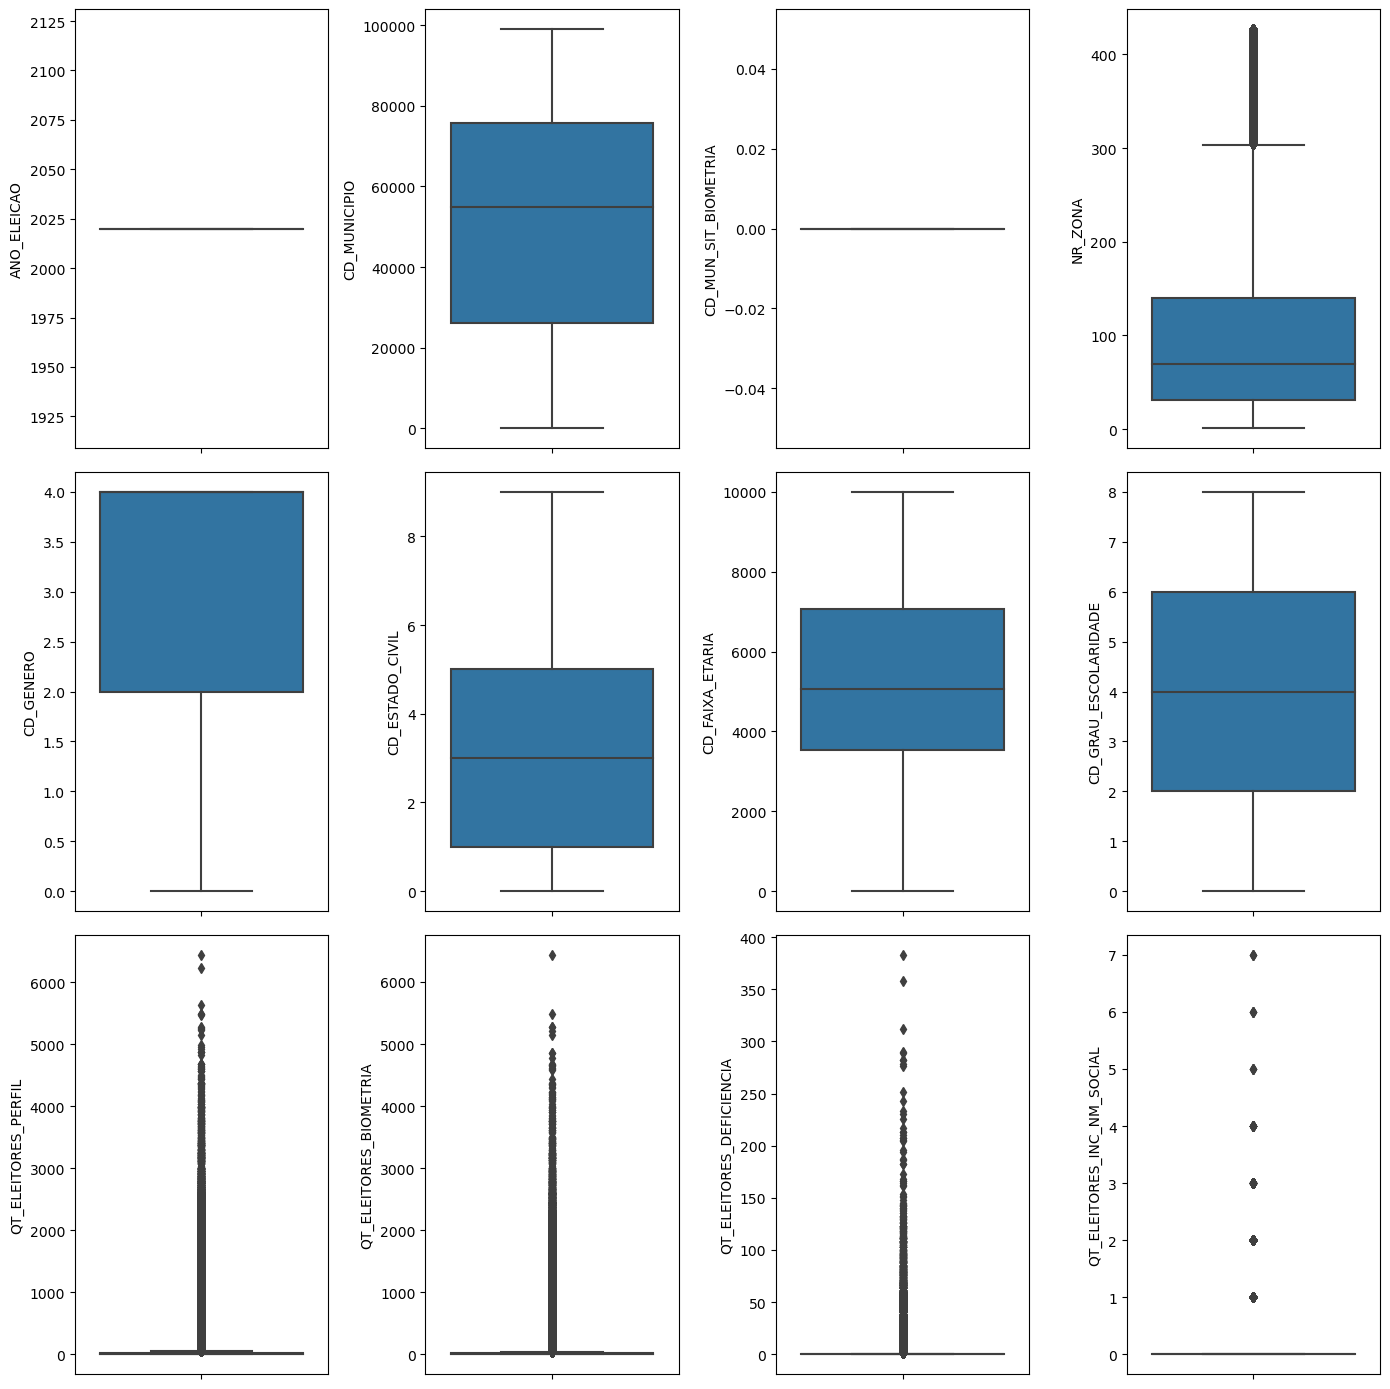

In [101]:
#Este loop percorre as colunas do DataSet verificando se tal váriavel é númerica, caso sim, é adicionado na lista
variaveis_numericas = []
for i in eleitorado.columns[0:21].tolist():
        if eleitorado.dtypes[i] == 'int64' or eleitorado.dtypes[i] == 'float64':            
            # print(i, ':' , eleitorado.dtypes[i]) 
            variaveis_numericas.append(i)
  
#Criando gráfico
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 4)

linha = 0
coluna = 0
#Este loop percorre a lista da colunas númericas e plota um gráfico para cada váriavel
for i in variaveis_numericas:
    sns.boxplot(data = eleitorado, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 